<a href="https://colab.research.google.com/github/puravraj2805/MS-DAB/blob/main/Loan_Approval_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
df=pd.read_csv('/content/drive/MyDrive/loan data.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


<Axes: >

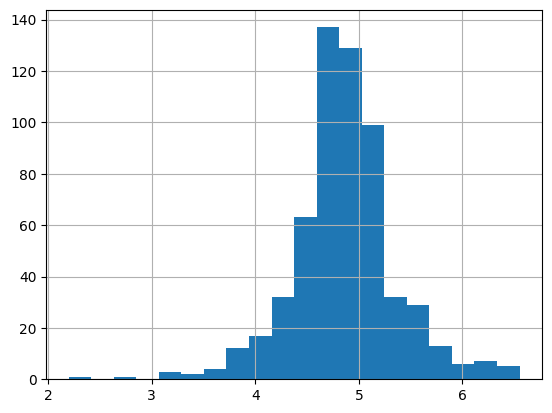

In [5]:
df['LoanAmount_log']=np.log(df['LoanAmount'])
df['LoanAmount_log'].hist(bins=20)

In [6]:
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


<Axes: >

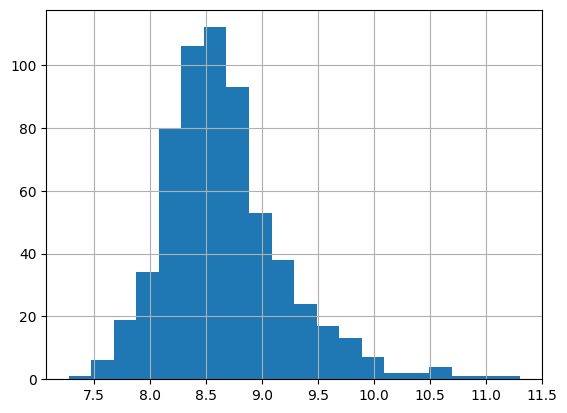

In [7]:
df['TotalIncome']=df['ApplicantIncome']+df['CoapplicantIncome']
df['TotalIncome_log']=np.log(df['TotalIncome'])
df['TotalIncome_log'].hist(bins=20)

In [8]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)

df.LoanAmount= df.LoanAmount.fillna(df.LoanAmount.mean())
df.LoanAmount_log= df.LoanAmount_log.fillna(df.LoanAmount_log.mean())

df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)

df.isnull().sum()


<ipython-input-8-ae121416c96e>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
<ipython-input-8-ae121416c96e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [9]:
x=df.iloc[:,np.r_[1:5,9:11,13:15]].values
y=df.iloc[:,12].values

x

array([['Male', 'No', '0', ..., 1.0, 4.857444178729352, 5849.0],
       ['Male', 'Yes', '1', ..., 1.0, 4.852030263919617, 6091.0],
       ['Male', 'Yes', '0', ..., 1.0, 4.189654742026425, 3000.0],
       ...,
       ['Male', 'Yes', '1', ..., 1.0, 5.53338948872752, 8312.0],
       ['Male', 'Yes', '2', ..., 1.0, 5.231108616854587, 7583.0],
       ['Female', 'No', '0', ..., 0.0, 4.890349128221754, 4583.0]],
      dtype=object)

In [10]:
y

array(['Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N',
       'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'N',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'N

In [12]:
print("per of missing gender is  %2f%%" %((df['Gender'].isnull().sum()/df.shape[0])*100))

per of missing gender is  0.000000%


number of people who take loan as groupby gender:
Gender
Male      502
Female    112
Name: count, dtype: int64


<ipython-input-13-dc6c22c78bb1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender',data=df,palette='Set1')


<Axes: xlabel='Gender', ylabel='count'>

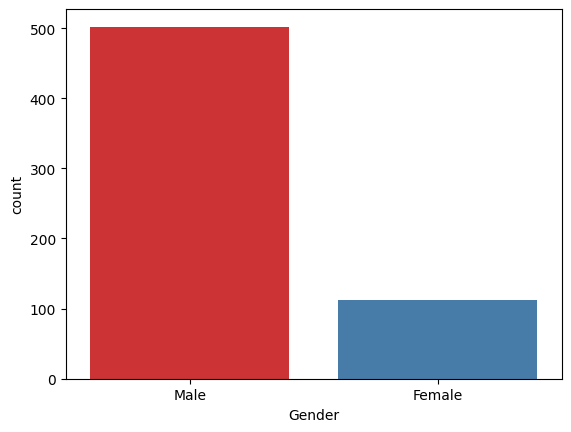

In [13]:
print("number of people who take loan as groupby gender:")
print(df.Gender.value_counts())
sns.countplot(x='Gender',data=df,palette='Set1')

number of people who take loan as groupby marital status:
Married
Yes    401
No     213
Name: count, dtype: int64


<ipython-input-14-b3b17d65d639>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Married',data=df,palette='Set1')


<Axes: xlabel='Married', ylabel='count'>

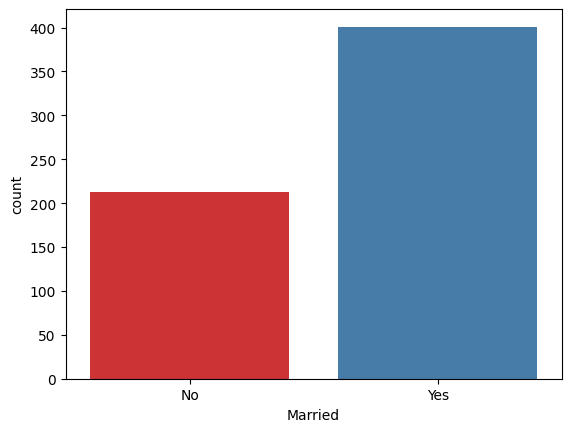

In [14]:
print("number of people who take loan as groupby marital status:")
print(df.Married.value_counts())
sns.countplot(x='Married',data=df,palette='Set1')

number of people who take loan as groupby Dependents:
Dependents
0     360
1     102
2     101
3+     51
Name: count, dtype: int64


<ipython-input-15-f1b0810d0484>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Dependents',data=df,palette='Set1')


<Axes: xlabel='Dependents', ylabel='count'>

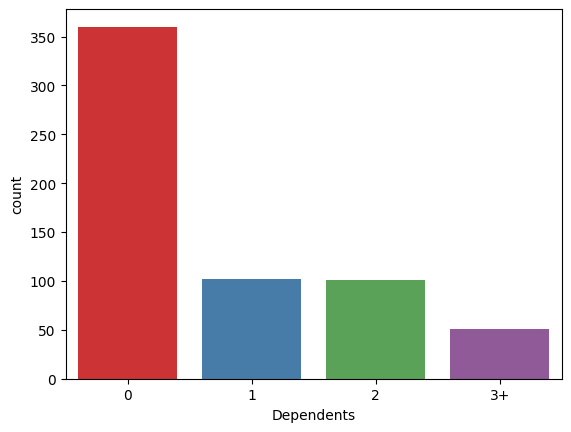

In [15]:
print("number of people who take loan as groupby Dependents:")
print(df.Dependents.value_counts())
sns.countplot(x='Dependents',data=df,palette='Set1')

number of people who take loan as groupby Self employed:
Self_Employed
No     532
Yes     82
Name: count, dtype: int64


<ipython-input-16-09372afb7ad9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Self_Employed',data=df,palette='Set1')


<Axes: xlabel='Self_Employed', ylabel='count'>

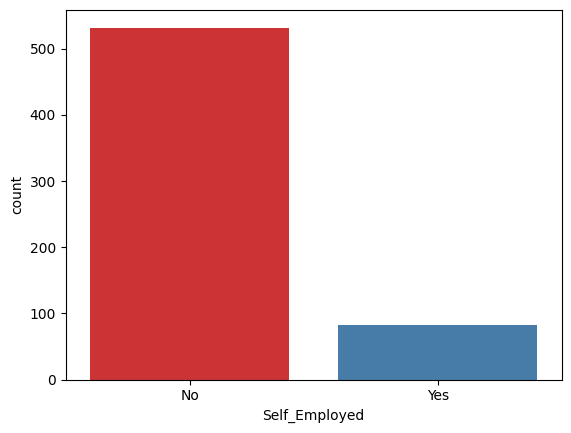

In [16]:
print("number of people who take loan as groupby Self employed:")
print(df.Self_Employed.value_counts())
sns.countplot(x='Self_Employed',data=df,palette='Set1')

number of people who take loan as groupby Loanamount:
LoanAmount
146.412162    22
120.000000    20
110.000000    17
100.000000    15
160.000000    12
              ..
240.000000     1
214.000000     1
59.000000      1
166.000000     1
253.000000     1
Name: count, Length: 204, dtype: int64


<ipython-input-17-1c48887351f4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='LoanAmount',data=df,palette='Set1')


<Axes: xlabel='LoanAmount', ylabel='count'>

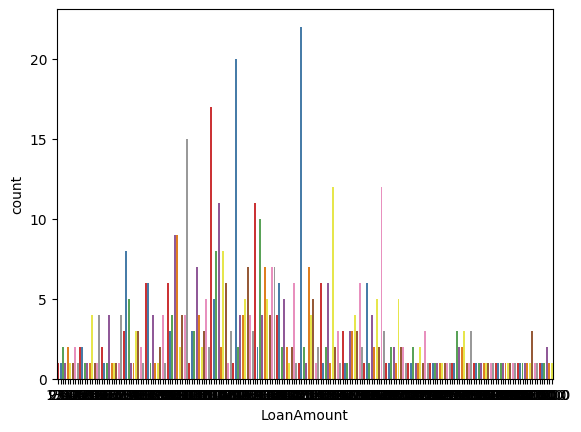

In [17]:
print("number of people who take loan as groupby Loanamount:")
print(df.LoanAmount.value_counts())
sns.countplot(x='LoanAmount',data=df,palette='Set1')

number of people who take loan as groupby Credit history:
Credit_History
1.0    525
0.0     89
Name: count, dtype: int64


<ipython-input-18-5ddcdf48b37a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Credit_History',data=df,palette='Set1')


<Axes: xlabel='Credit_History', ylabel='count'>

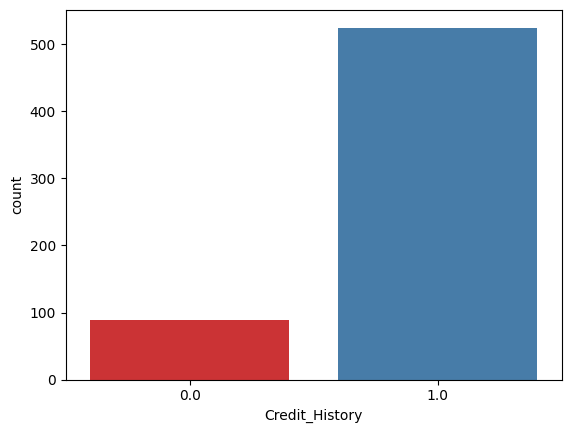

In [18]:
print("number of people who take loan as groupby Credit history:")
print(df.Credit_History.value_counts())
sns.countplot(x='Credit_History',data=df,palette='Set1')

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

from sklearn.preprocessing import LabelEncoder
Labelencoder_x=LabelEncoder()

In [24]:
for i in range(0,5):
  x_train[:,i]=Labelencoder_x.fit_transform(x_train[:,i])
  x_train[:,7]=Labelencoder_x.fit_transform(x_train[:,7])
x_train

array([[1, 1, 0, ..., 1.0, 4.875197323201151, 267],
       [1, 0, 1, ..., 1.0, 5.278114659230517, 407],
       [1, 1, 0, ..., 0.0, 5.003946305945459, 249],
       ...,
       [1, 1, 3, ..., 1.0, 5.298317366548036, 363],
       [1, 1, 0, ..., 1.0, 5.075173815233827, 273],
       [0, 1, 0, ..., 1.0, 5.204006687076795, 301]], dtype=object)

In [25]:
labelencoder_y=LabelEncoder()
y_train=labelencoder_y.fit_transform(y_train)

y_train

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,

In [26]:
for i in range(0,5):
  x_test[:,i]=Labelencoder_x.fit_transform(x_test[:,i])
  x_test[:,7]=Labelencoder_x.fit_transform(x_test[:,7])
x_test

array([[1, 0, 0, 0, 5, 1.0, 4.430816798843313, 85],
       [0, 0, 0, 0, 5, 1.0, 4.718498871295094, 28],
       [1, 1, 0, 0, 5, 1.0, 5.780743515792329, 104],
       [1, 1, 0, 0, 5, 1.0, 4.700480365792417, 80],
       [1, 1, 2, 0, 5, 1.0, 4.574710978503383, 22],
       [1, 1, 0, 1, 3, 0.0, 5.10594547390058, 70],
       [1, 1, 3, 0, 3, 1.0, 5.056245805348308, 77],
       [1, 0, 0, 0, 5, 1.0, 6.003887067106539, 114],
       [1, 0, 0, 0, 5, 0.0, 4.820281565605037, 53],
       [1, 1, 0, 0, 5, 1.0, 4.852030263919617, 55],
       [0, 0, 0, 0, 5, 1.0, 4.430816798843313, 4],
       [1, 1, 1, 0, 5, 1.0, 4.553876891600541, 2],
       [0, 0, 0, 0, 5, 1.0, 5.634789603169249, 96],
       [1, 1, 2, 0, 5, 1.0, 5.4638318050256105, 97],
       [1, 1, 0, 0, 5, 1.0, 4.564348191467836, 117],
       [1, 1, 1, 0, 5, 1.0, 4.204692619390966, 22],
       [1, 0, 1, 1, 5, 1.0, 5.247024072160486, 32],
       [1, 0, 0, 1, 5, 1.0, 4.882801922586371, 25],
       [0, 0, 0, 0, 5, 1.0, 4.532599493153256, 1],
       [1, 1

In [27]:
labelencoder_y=LabelEncoder()
y_test=labelencoder_y.fit_transform(y_test)
y_test

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1])

In [28]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.fit_transform(x_test)

In [29]:
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier()
rf_clf.fit(x_train,y_train)

RandomForestClassifier()

In [31]:
from sklearn import metrics
y_pred=rf_clf.predict(x_test)
print("Accuracy of random forest classification is:",metrics.accuracy_score(y_pred,y_test))
y_pred

Accuracy of random forest classification is: 0.7804878048780488


array([0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1])

In [32]:
from sklearn.naive_bayes import GaussianNB
nb_clf=GaussianNB()
nb_clf.fit(x_train,y_train)

GaussianNB()

In [33]:
y_pred=nb_clf.predict(x_test)
print("Accuracy of naive bayes classification is:",metrics.accuracy_score(y_pred,y_test))
y_pred

Accuracy of naive bayes classification is: 0.8292682926829268


array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1])

In [34]:
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier()
dt_clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [35]:
y_pred=dt_clf.predict(x_test)
print("Accuracy of decision tree classification is:",metrics.accuracy_score(y_pred,y_test))
y_pred

Accuracy of decision tree classification is: 0.7154471544715447


array([0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1])

In [36]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf=KNeighborsClassifier()
knn_clf.fit(x_train,y_train)

KNeighborsClassifier()

In [37]:
y_pred=knn_clf.predict(x_test)
print("Accuracy of knn classification is:",metrics.accuracy_score(y_pred,y_test))
y_pred

Accuracy of knn classification is: 0.7967479674796748


array([1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1])

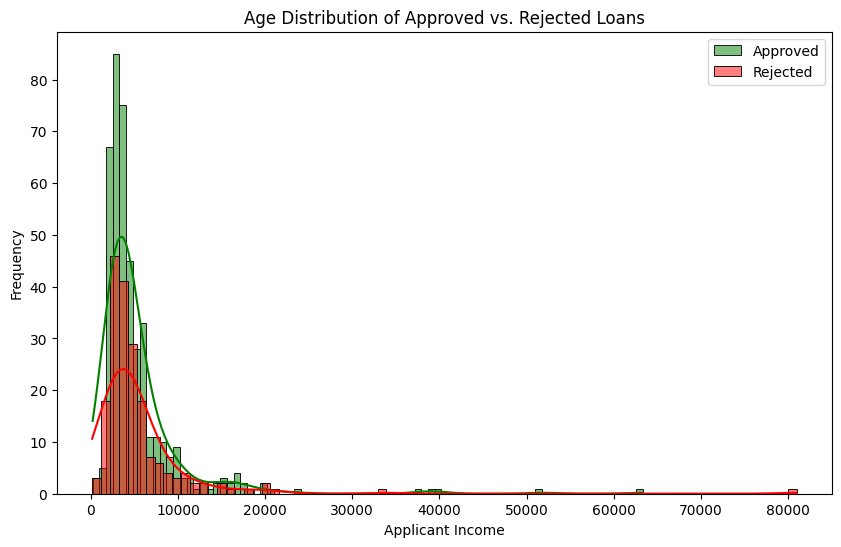

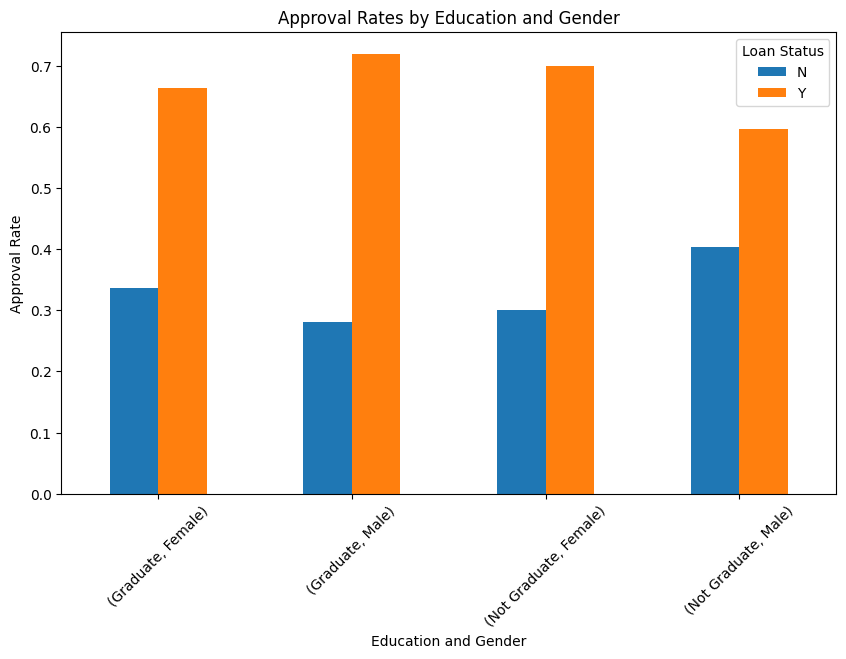

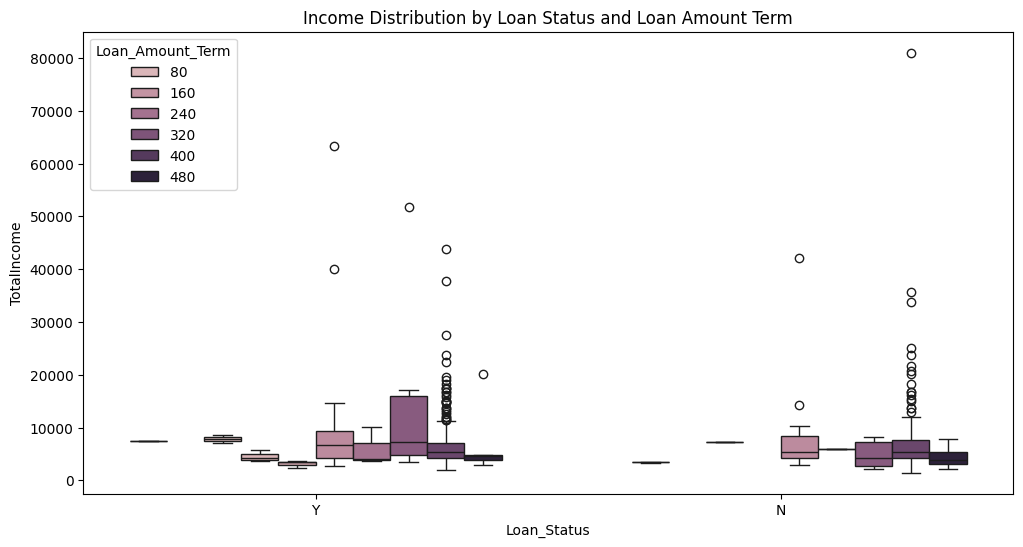

In [38]:
plt.figure(figsize=(10, 6))
sns.histplot(df[df['Loan_Status'] == 'Y']['ApplicantIncome'], color='green', label='Approved', kde=True)
sns.histplot(df[df['Loan_Status'] == 'N']['ApplicantIncome'], color='red', label='Rejected', kde=True)
plt.title('Age Distribution of Approved vs. Rejected Loans')
plt.xlabel('Applicant Income')
plt.ylabel('Frequency')
plt.legend()
plt.show()

education_gender_approval = df.groupby(['Education', 'Gender'])['Loan_Status'].value_counts(normalize=True).unstack()
education_gender_approval.plot(kind='bar', figsize=(10, 6))
plt.title('Approval Rates by Education and Gender')
plt.xlabel('Education and Gender')
plt.ylabel('Approval Rate')
plt.xticks(rotation=45)
plt.legend(title='Loan Status')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Loan_Status', y='TotalIncome', hue='Loan_Amount_Term', data=df)
plt.title('Income Distribution by Loan Status and Loan Amount Term')
plt.show()

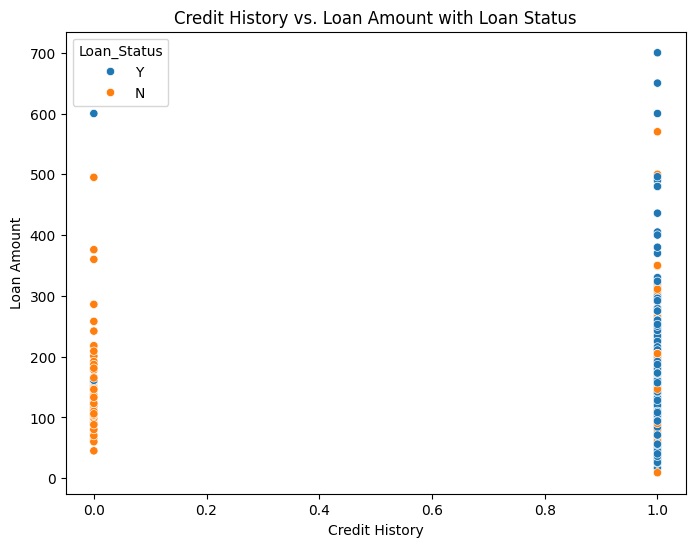

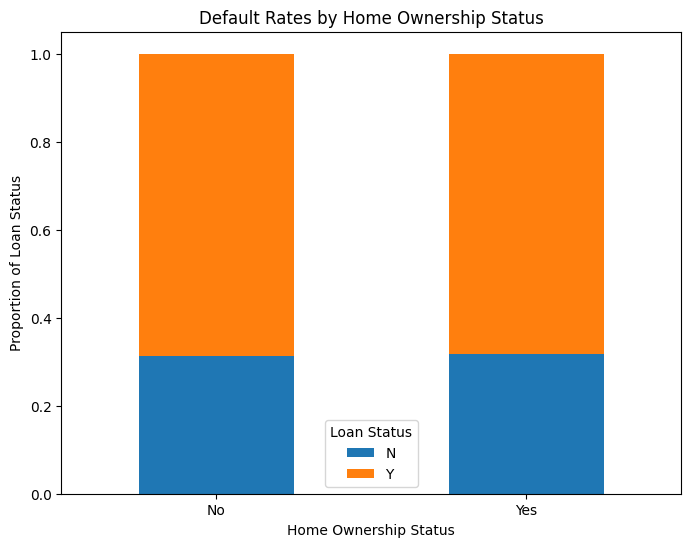

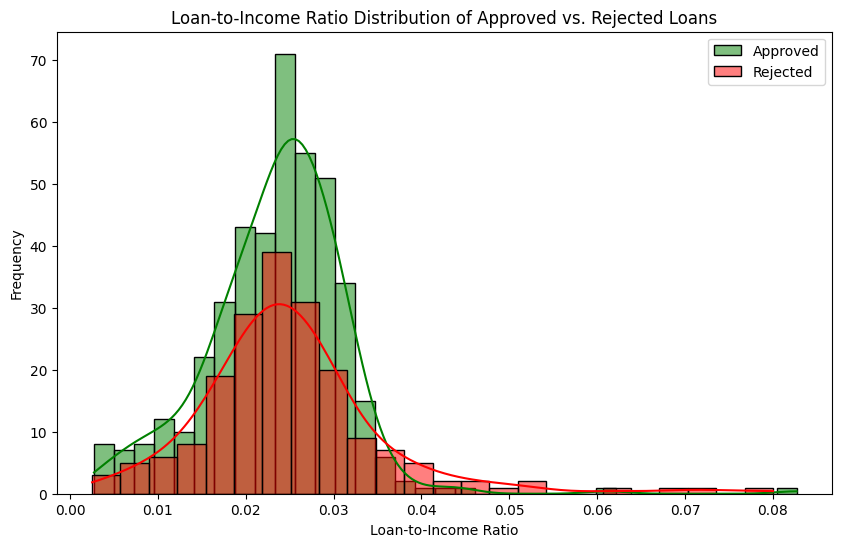

In [39]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Credit_History', y='LoanAmount', hue='Loan_Status', data=df)
plt.title('Credit History vs. Loan Amount with Loan Status')
plt.xlabel('Credit History')
plt.ylabel('Loan Amount')
plt.show()

home_ownership_defaults = df.groupby('Self_Employed')['Loan_Status'].value_counts(normalize=True).unstack()
home_ownership_defaults.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Default Rates by Home Ownership Status')
plt.xlabel('Home Ownership Status')
plt.ylabel('Proportion of Loan Status')
plt.xticks(rotation=0)
plt.legend(title='Loan Status')
plt.show()

df['Loan_to_Income_Ratio'] = df['LoanAmount'] / df['TotalIncome']
plt.figure(figsize=(10, 6))
sns.histplot(df[df['Loan_Status'] == 'Y']['Loan_to_Income_Ratio'], color='green', label='Approved', kde=True)
sns.histplot(df[df['Loan_Status'] == 'N']['Loan_to_Income_Ratio'], color='red', label='Rejected', kde=True)
plt.title('Loan-to-Income Ratio Distribution of Approved vs. Rejected Loans')
plt.xlabel('Loan-to-Income Ratio')
plt.ylabel('Frequency')
plt.legend()
plt.show()

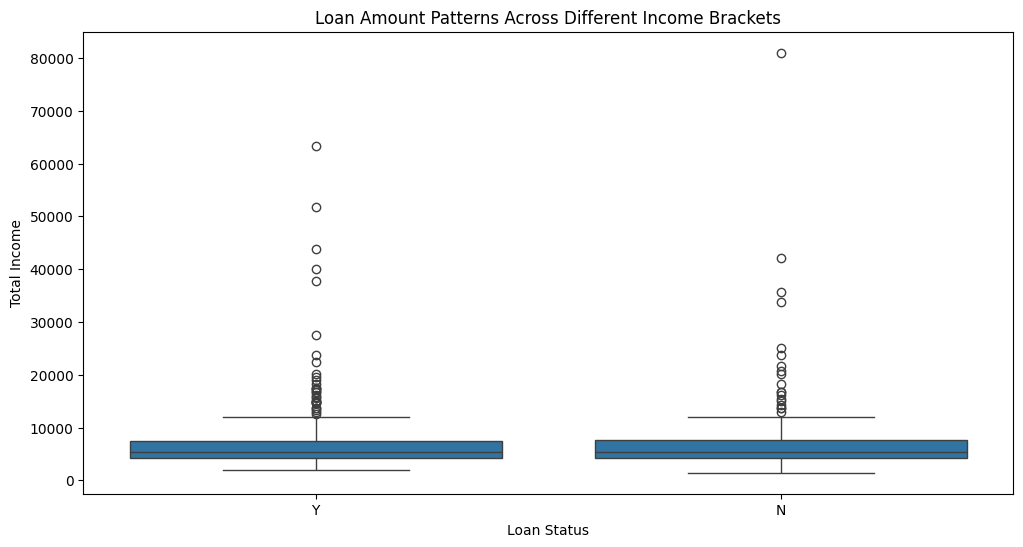

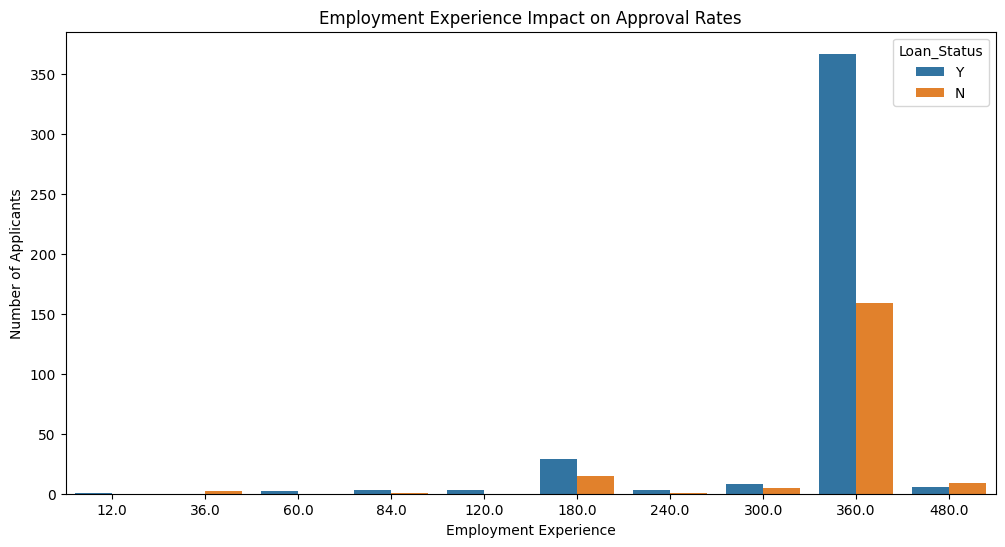

In [41]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Loan_Status', y='TotalIncome', data=df)
plt.title('Loan Amount Patterns Across Different Income Brackets')
plt.xlabel('Loan Status')
plt.ylabel('Total Income')
plt.show()


plt.figure(figsize=(12,6))
sns.countplot(x='Loan_Amount_Term', hue='Loan_Status', data=df)
plt.title('Employment Experience Impact on Approval Rates')
plt.xlabel('Employment Experience')
plt.ylabel('Number of Applicants')
plt.show()

Logistic Regression:
  Precision: 0.822429906542056
  Recall: 0.9777777777777777
  F1-score: 0.8934010152284264

Random Forest:
  Precision: 0.8217821782178217
  Recall: 0.9222222222222223
  F1-score: 0.8691099476439791


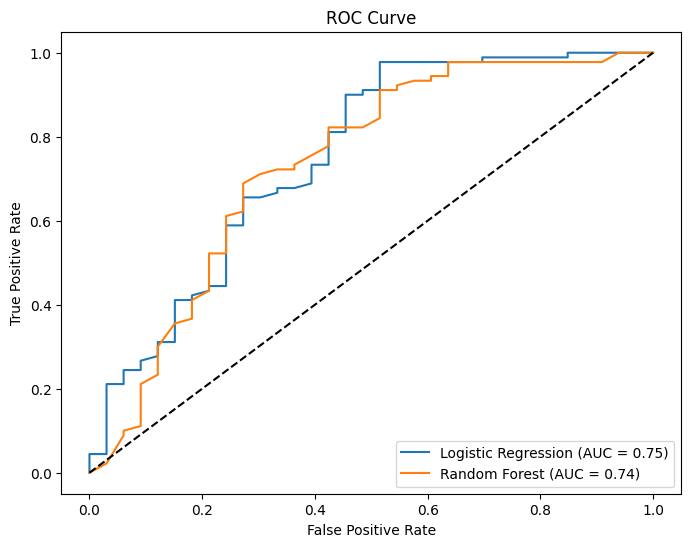

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc

logreg = LogisticRegression(solver='liblinear')
rfe = RFE(estimator=logreg, n_features_to_select=5)
X_train_rfe = rfe.fit_transform(x_train, y_train)
X_test_rfe = rfe.transform(x_test)

logreg.fit(X_train_rfe, y_train)
y_pred_logreg = logreg.predict(X_test_rfe)

print("Logistic Regression:")
print(f"  Precision: {precision_score(y_test, y_pred_logreg)}")
print(f"  Recall: {recall_score(y_test, y_pred_logreg)}")
print(f"  F1-score: {f1_score(y_test, y_pred_logreg)}")


print("\nRandom Forest:")
print(f"  Precision: {precision_score(y_test, y_pred)}")
print(f"  Recall: {recall_score(y_test, y_pred)}")
print(f"  F1-score: {f1_score(y_test, y_pred)}")


y_prob_logreg = logreg.predict_proba(X_test_rfe)[:, 1]
y_prob_rf = rf_clf.predict_proba(x_test)[:, 1]

fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_prob_logreg)
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_logreg, tpr_logreg, label=f'Logistic Regression (AUC = {roc_auc_logreg:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [43]:
def calculate_risk_score(row):
    """Calculates a risk score based on weighted features."""
    score = 0
    score += row['Credit_History'] * 0.4
    score += row['LoanAmount'] * 0.3
    score += row['TotalIncome'] * 0.2
    score += row['Loan_Amount_Term'] * 0.1

    return score

df['Risk_Score'] = df.apply(calculate_risk_score, axis=1)

def risk_categorization(risk_score):
    """Categorizes risk scores into different levels."""

    if risk_score <= 0.2:
      return 'Low Risk'
    elif 0.2 < risk_score <= 0.5:
      return 'Medium Risk'
    else:
      return 'High Risk'

df['Risk_Category'] = df['Risk_Score'].apply(risk_categorization)

risk_approval_rates = df.groupby('Risk_Category')['Loan_Status'].value_counts(normalize=True)
print("Risk Category Approval Rates:")
print(risk_approval_rates)


tolerance_levels = {
    'Conservative': 0.3,
    'Moderate': 0.4,
    'Aggressive': 0.5,
}

for level, threshold in tolerance_levels.items():
    df[f'{level}_Approval'] = df['Risk_Score'].apply(lambda x: 'Approve' if x < threshold else 'Reject')


from sklearn.metrics import accuracy_score
actual_decisions = df['Loan_Status']
predicted_decisions = df['Moderate_Approval']

validation_accuracy = accuracy_score(actual_decisions, predicted_decisions)
print(f"Validation Accuracy (Moderate Tolerance): {validation_accuracy}")


print(df.head())


Risk Category Approval Rates:
Risk_Category  Loan_Status
High Risk      Y              0.687296
               N              0.312704
Name: proportion, dtype: float64
Validation Accuracy (Moderate Tolerance): 0.0
    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  ...  \
0             5849                0.0  146.412162             360.0  ...   
1             4583             1508.0  128.000000             360.0  ...   
2             3000                0.0   66.000000             360.0  ...   
3             2583             2358.0  120.000000             360.0

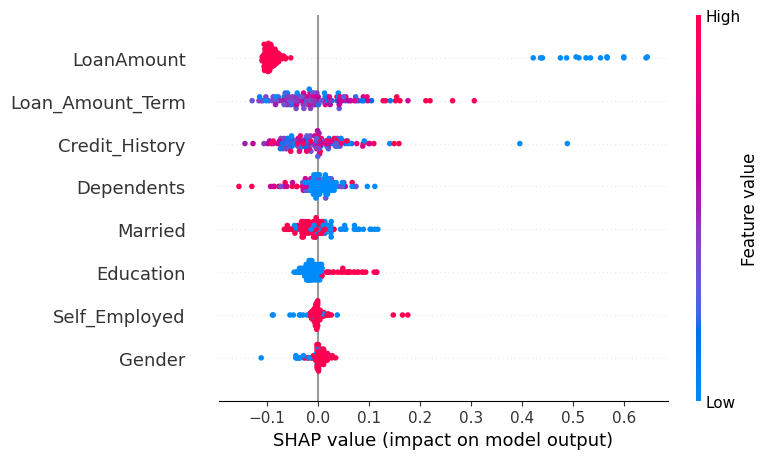

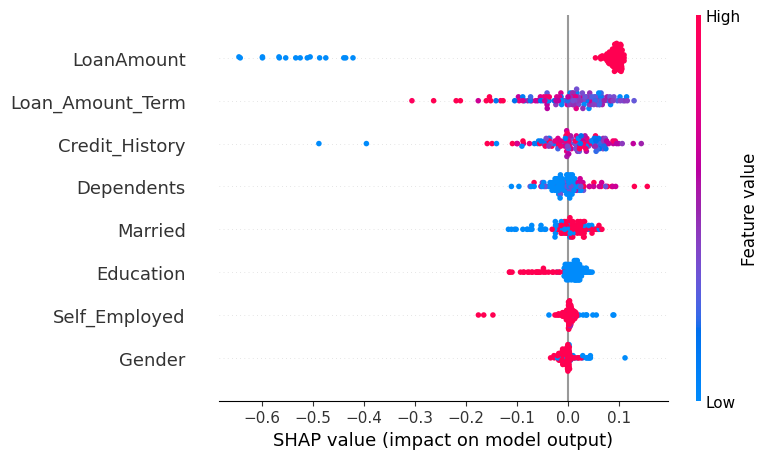

In [47]:
import shap

explainer = shap.TreeExplainer(rf_clf)
shap_values = explainer.shap_values(x_test)

feature_names = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

if len(shap_values.shape) == 3:
    for class_index in range(shap_values.shape[2]):
        shap.summary_plot(shap_values[:, :, class_index], x_test, feature_names=feature_names)